## Save geocoded HDF5 file into text file

In [1]:
# read / save displacement data from time-series file
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mintpy.utils import readfile, utils as ut
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/data/archives/Galapagos/AlcedoSenDT128/mintpy')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/data/archives/Galapagos/AlcedoSenDT128/mintpy


### Input HDF5 files

In [2]:
# geocoded file paths [for input dataset in radar coordinates]
ts_file = 'geo/geo_timeseries_ECMWF_ramp_demErr.h5';  date1, date2 = '20160101', '20171022'
vel_file = 'geo/geo_velocity.h5'
mask_file = 'geo/geo_maskTempCoh.h5'
geom_file = 'geo/geo_geometryRadar.h5'

# geocoded file paths [for input dataset in geo coordinates]
# ts_file = 'timeseries_ECMWF_ramp_demErr.h5';  date12 = '20160101_20171022'
# vel_file = 'velocity.h5'
# mask_file = 'maskTempCoh.h5'
# geom_file = 'inputs/geometryGeo.h5'

### Read

In [3]:
# read displacement data between two dates in meters from time series file
dis, atr = readfile.read(ts_file, datasetName=date2)
dis -= readfile.read(ts_file, datasetName=date1)[0]
# OR read displacement data in meters per year from velocity file
# dis, atr = readfile.read(vel_file)

# read geometry data: latitude, longitude, incidence angle and azimuth angle
lat, lon = ut.get_lat_lon(atr)
inc_angle = readfile.read(geom_file, datasetName='incidenceAngle')[0] * np.pi / 180.
az_angle  = readfile.read(geom_file, datasetName='azimuthAngle')[0] * np.pi / 180.

# mask out invalid / unreliable pixels
mask = readfile.read(mask_file)[0]
mask *= ~np.isnan(inc_angle)
dis[mask == 0] = np.nan
lat[mask == 0] = np.nan
lon[mask == 0] = np.nan
inc_angle[mask == 0] = np.nan
az_angle[mask == 0] = np.nan

# calculate the unit vector for InSAR displacement [positive for motion toward from satellite]
ve = np.sin(inc_angle) * np.sin(az_angle) * -1
vn = np.sin(inc_angle) * np.cos(az_angle)
vu = np.cos(inc_angle)

/var/folders/bg/9j3hscxn7t53s3c078rlck7c0000gq/T/ipykernel_32575/528405277.py:22: RuntimeWarning: invalid value encountered in sin
  ve = np.sin(inc_angle) * np.sin(az_angle) * -1
/var/folders/bg/9j3hscxn7t53s3c078rlck7c0000gq/T/ipykernel_32575/528405277.py:23: RuntimeWarning: invalid value encountered in sin
  vn = np.sin(inc_angle) * np.cos(az_angle)
/var/folders/bg/9j3hscxn7t53s3c078rlck7c0000gq/T/ipykernel_32575/528405277.py:23: RuntimeWarning: invalid value encountered in cos
  vn = np.sin(inc_angle) * np.cos(az_angle)
/var/folders/bg/9j3hscxn7t53s3c078rlck7c0000gq/T/ipykernel_32575/528405277.py:24: RuntimeWarning: invalid value encountered in cos
  vu = np.cos(inc_angle)


### Plot

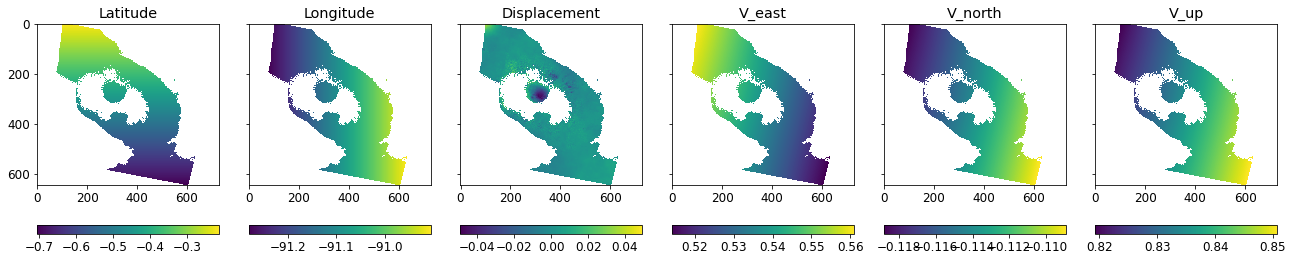

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=[18, 4], sharey=True)
titles = ['Latitude', 'Longitude', 'Displacement', 'V_east', 'V_north', 'V_up']
for ax, data, title in zip(axs, [lat, lon, dis, ve, vn, vu], titles):
    im = ax.imshow(data, interpolation='nearest')
    fig.colorbar(im, ax=ax, location='bottom')
    ax.set_title(title)
fig.tight_layout()
plt.show()

### Write to text file

In [5]:
out_file = os.path.abspath(f'dis_{date1}_{date2}.txt')
header =  'number of points: {}\n'.format(np.sum(mask))
header += 'reference pixel in in (lat, lon): ({}, {})\n'.format(atr['REF_LAT'], atr['REF_LON'])
header += 'latitude       longitude    displacement[m]        Vz              Vn              Ve'
data = np.hstack((
    lat[mask].reshape(-1, 1),
    lon[mask].reshape(-1, 1),
    dis[mask].reshape(-1, 1),
    ve[mask].reshape(-1, 1),
    vn[mask].reshape(-1, 1),
    vu[mask].reshape(-1, 1),
))
print('writing to text file: {}'.format(out_file))
np.savetxt(out_file, data, fmt='%10.6f', delimiter='\t', header=header)
print('finished writing.')

writing to text file: /Users/yunjunz/data/archives/Galapagos/AlcedoSenDT128/mintpy/dis_20160101_20171022.txt
finished writing.


In [6]:
# The saved text file is shown as below:
with open(out_file, 'r') as f:
    head = ''.join([next(f) for x in range(15)])
print(head)

# number of points: 147610
# reference pixel in in (lat, lon): (-0.3100264, -91.22004)
# latitude       longitude    displacement[m]        Vz              Vn              Ve
 -0.213234	-91.263847	  0.041109	  0.560912	 -0.118835	  0.819302
 -0.213234	-91.263168	  0.041109	  0.560912	 -0.118835	  0.819302
 -0.213234	-91.262497	  0.041109	  0.560912	 -0.118835	  0.819302
 -0.213234	-91.261818	  0.041183	  0.560912	 -0.118835	  0.819302
 -0.213234	-91.261147	  0.040227	  0.560851	 -0.118821	  0.819346
 -0.213234	-91.260468	  0.039409	  0.560787	 -0.118808	  0.819392
 -0.213234	-91.259796	  0.039049	  0.560725	 -0.118794	  0.819436
 -0.213234	-91.259117	  0.038237	  0.560663	 -0.118781	  0.819480
 -0.213234	-91.258446	  0.037736	  0.560599	 -0.118767	  0.819526
 -0.213234	-91.257767	  0.036330	  0.560526	 -0.118751	  0.819578
 -0.213234	-91.257095	  0.035553	  0.560458	 -0.118737	  0.819627
 -0.213234	-91.256416	  0.034447	  0.560325	 -0.118708	  0.819722

